# Technical proposal sensor tuning

## Techniques to clean the data overview

### Standard tecniques

The most common known techniques to clean the data span from frequentist approach till simplestatistical approaches.

From my past experience I can better explain the frequentist approach, which consists in a deep analysis of frequency content of both noise and useful data information. In a time series the noise can fall into different categories. If we are lucky enough can be frequency specific, therefore a bandpass filter can solve most of the problems, especially if the usefull banwith falls into a lower frequency bandwith that ca be efficiently isolated.

In most of the cases to restore some of the original shape of a signal can be used filtering as simple as Auto Regressive or Moving Avarage filters. We shall not forget the pitfall of simple approaches like the minimum phase shift induction, which can be corrected by running the filter in two steps(opposite direction) or apply a phase compensation inside our code.

### ML techniques

In machine learning we have a wide variety of tools that can be used, however tha main decision must be taken at the beginning:
    
What is my target? It mean what I am trying to achieve.


### Clustering alorithm:

In respect to the noise understanding and noise reduction clustering can be used to separate the useful bandwith from the spurious events.

Some of the Clustering alorithms are:

Centroid-based clustering organizes the data into non-hierarchical clusters, in contrast to hierarchical clustering defined below. k-means is the most widely-used centroid-based clustering algorithm. Centroid-based algorithms are efficient but sensitive to initial conditions and outliers. This course focuses on k-means because it is an efficient, effective, and simple clustering algorithm.

Density-based clustering connects areas of high example density into clusters. This allows for arbitrary-shaped distributions as long as dense areas can be connected. These algorithms have difficulty with data of varying densities and high dimensions. Further, by design, these algorithms do not assign outliers to clusters.

Distribution-based Clustering approach assumes data is composed of distributions, such as Gaussian distributions. The distribution-based algorithm clusters data into distinct Gaussian distributions. As distance from the distribution's center increases, the probability that a point belongs to the distribution decreases. When you do not know the type of distribution in your data, you should use a different algorithm.

Hierarchical clustering creates a tree of clusters. Hierarchical clustering, not surprisingly, is well suited to hierarchical data, such as taxonomies. This method is not applicable to our time series.

In detail two classification methods can be used to separate noisy events from underlying good data:

First DBscan (density method), which is extremely powerful in separating outliers, but is quiote difficult to set up the Epsilon value at the beginning. The biggest advantage is that the clusters can be any shape, evem clusters within clusters.

Second GMM model can be used (Gaussian mixture models, probabilistic model), we can choose various cluster shapes or even let the algorithm to decide what to choose.

### Classification alorithm:

n machine learning, classification refers to a predictive modeling problem where a class label is predicted for a given example of input data

This type of method will not fit at best to our target to reduce the overall noise at it simply separate the data 

### Regression Methods

Various regression models can be used to extract the underlying information. 

The most appropriate could be the polinomial regression that can be trained efficiently to extract relevant trend information while preserving a good bias-variance balance.

We have various tools in scikit-learn to apply regression with polynomila fit, efficient error reduction and cost function (norm l1,l2, etc..) and efficient cross validation methods to optimize our model (i.e. GeridSarchCV).

This is probably the most funcional and easy to implement methodology.

### Neural networks

The neural networks methods are the mostadvanced and by far the most complicated mathods. However a brief intro can be useful to undertsand the basic workflow.

A basic neural network is one input layer, a hidden layer (the decision maker), an out layer.
A basic hidden layer is a neuron which takes a group of weighted inputs, applies an activation function, and returns an output.

Neural network are particularly useful in Time series analysis because they can be more customized, complicated and scaled for the detail purpose. Best case are is RNN (recurrent neural network), it is a class of artificial neural networks where connections between nodes form a directed or undirected graph along a temporal sequence. This allows it to exhibit temporal dynamic behavior.

In contrary, they are heavy in computing time.

## Performance Evaluation Metrics

There are several tools that we can use to evaluate and understand our outputs.

Some of the most commonly used metrix are:
    
--confusion matrix

--f1score

--jaccard score

--AUC-ROC curves

--log loss

--RMSE 

--Root Mean Squared Logarithmic Error

--R-Squared

--Cross Validation

Cross Validation is one of the most important concepts in any type of data modelling. It simply says, try to leave a sample on which you do not train the model and test the model on this sample before finalizing the model.

Could there be a negative side of the above approach?

I believe, a negative side of this approach is that we loose a good amount of data from training the model. Hence, the model is very high bias. And this won’t give best estimate for the coefficients. To improve cross validation a k-fold approach can be used to shuffle tda train and test data, avoid overfitting and don't increase the bias.



## Case Study

In our case study we will use a very simple neural network to try to reduce some of the noise in the undelying signal.

For our test we will use Keras.

### The dataset

Since I cannot find a dataset that I like I used a generator to create a sine wave then pollute it with noise

First of all we import the relevant libraries

In [182]:
import matplotlib.pyplot as plt
import numpy as np


Configure the number of samples

In [183]:
# Sample configuration
num_samples = 100000

In [184]:
# Intrasample configuration
num_elements = 1
interval_per_element = 0.01
total_num_elements = int(num_elements / interval_per_element)
starting_point = int(0 - 0.5*total_num_elements)
# Other configuration
num_samples_visualize = 1

Generate the sine waves in each sample

In [343]:
# Containers for samples and subsamples
samples = []
xs = []
ys = []
# Generate samples
for j in range(0, num_samples):
  # Report progress
  if j % 100 == 0:
    pass
  # Generate wave
  for i in range(starting_point, total_num_elements):
    x_val = i * interval_per_element
    y_val = (math.sin(20*x_val)/2+0.5) 
    xs.append(x_val)
    ys.append(y_val)
  # Append wave to samples
  samples.append((xs, ys))
  # Clear subsample containers for next sample
  xs = []
  ys = []

plot the sine wave

(150,)


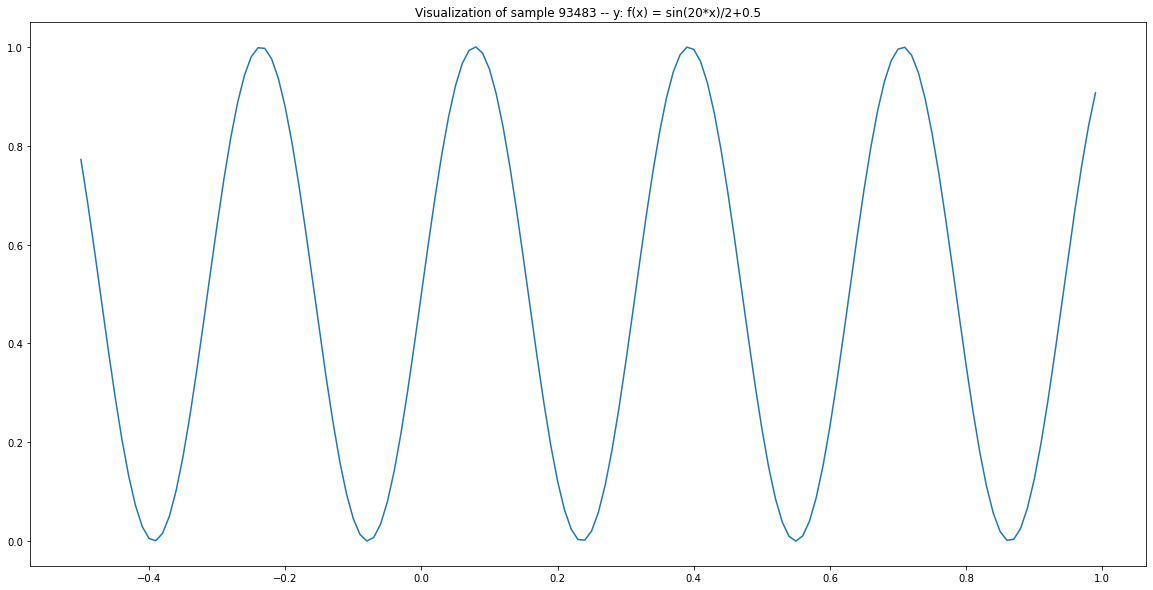

In [345]:

# Input shape
print(np.shape(np.array(samples[0][0])))
  
# Save data to file for re-use
np.save('./signal_waves_medium.npy', samples)

# Visualize a few random samples
for i in range(0, num_samples_visualize):
  random_index = np.random.randint(0, len(samples)-1)
  x_axis, y_axis = samples[random_index]
  plt.plot(x_axis, y_axis)
  plt.title(f'Visualization of sample {random_index} -- y: f(x) = sin(20*x)/2+0.5')
  plt.show()

configure the noise addition

In [346]:
# Sample configuration
num_samples_visualize = 1
noise_factor = 0.15

In [347]:
# Load data
data = np.load('./signal_waves_medium.npy')
x_val, y_val = data[:,0], data[:,1]

In [348]:
# Add noise to data
noisy_samples = []
for i in range(0, len(x_val)):
  if i % 100 == 0:
    pass
  pure = np.array(y_val[i])
  noise = np.random.normal(0, 1, pure.shape)
  signal = pure + noise_factor * noise
  noisy_samples.append([x_val[i], signal])

plot the noisy sine wave

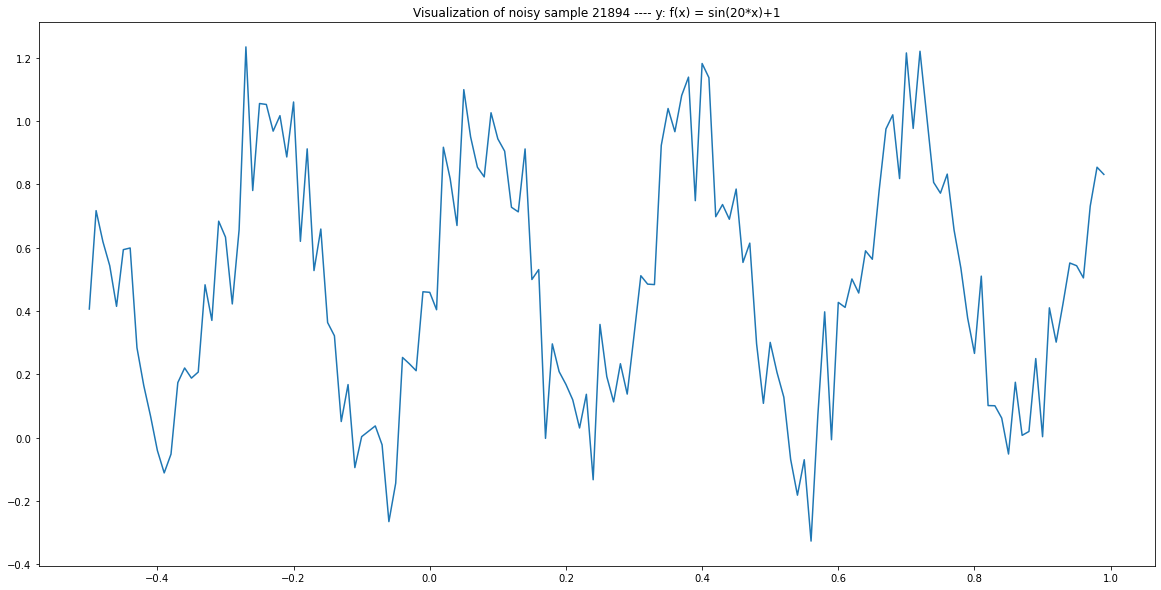

In [350]:
# Save data to file for re-use
np.save('./signal_waves_noisy_medium.npy', noisy_samples)

# Visualize a few random samples
for i in range(0, num_samples_visualize):
  random_index = np.random.randint(0, len(noisy_samples)-1)
  x_axis, y_axis = noisy_samples[random_index]
  plt.plot(x_axis, y_axis)
  plt.title(f'Visualization of noisy sample {random_index} ---- y: f(x) = sin(20*x)+1')
  plt.show()

We will use tensorflow and keras to perform our models.

Now install tensorflow

In [351]:
!pip install tensorflow

ensure that we have all the relevant libraries loaded

In [352]:
import tensorflow.keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, Conv1DTranspose
from tensorflow.keras.constraints import max_norm
import matplotlib.pyplot as plt
import numpy as np
import math

model configuration:

The input_shape, in line with Conv1D input, is thus [latex] (150, 1)[/latex].

The batch size is 150. This number seemed to work well, offering a nice balance between loss value and prediction time.

The number of epochs is fairly low, but pragmatic: the autoencoder did not improve substantially anymore after this number.

We use 40% of the total data, i.e. 40k samples, as testing data.

30% of the training data (60k) will be used for validation purposes. Hence, 18k will be used to validate the model per epoch (and even per minibatch), while 42k will be used for actual training.

All model outputs are displayed on screen, with verbosity mode set to True.

The max_norm_value is 2.0.

In [354]:
# Model configuration
input_shape = (150, 1)
batch_size = 150
no_epochs = 7
train_test_split = 0.4
validation_split = 0.3
verbosity = 1
max_norm_value = 2.0

In [355]:
# Load data previously saved
data_noisy = np.load('./signal_waves_noisy_medium.npy')
x_val_noisy, y_val_noisy = data_noisy[:,0], data_noisy[:,1]
data_pure = np.load('./signal_waves_medium.npy')
x_val_pure, y_val_pure = data_pure[:,0], data_pure[:,1]

To use the binary crossentropy loss we must normalize the data in the range [0,1] to prevent model extreme loss value outcome

In [356]:
# Reshape data
y_val_noisy_r = []
y_val_pure_r = []
for i in range(0, len(y_val_noisy)):
  noisy_sample = y_val_noisy[i]
  pure_sample = y_val_pure[i]
  noisy_sample = (noisy_sample - np.min(noisy_sample)) / (np.max(noisy_sample) - np.min(noisy_sample))
  pure_sample = (pure_sample - np.min(pure_sample)) / (np.max(pure_sample) - np.min(pure_sample))
  y_val_noisy_r.append(noisy_sample)
  y_val_pure_r.append(pure_sample)
y_val_noisy_r   = np.array(y_val_noisy_r)
y_val_pure_r    = np.array(y_val_pure_r)
noisy_input     = y_val_noisy_r.reshape((y_val_noisy_r.shape[0], y_val_noisy_r.shape[1], 1))
pure_input      = y_val_pure_r.reshape((y_val_pure_r.shape[0], y_val_pure_r.shape[1], 1))

Train and test data splitting

In [357]:
# Train/test split
percentage_training = math.floor((1 - train_test_split) * len(noisy_input))
noisy_input, noisy_input_test = noisy_input[:percentage_training], noisy_input[percentage_training:]
pure_input, pure_input_test = pure_input[:percentage_training], pure_input[percentage_training:]

Now we create the model layers:

We will have 7 layers.

The first 3 layers works as encoder with filters 128, 64 aand 32 respectively.Kernel size is 3 pixel.

The next 3 layers works as decoder with reverse pattern.

The last layer is just an output layer which doesn't affect the data.

We use the Leaky ReLu activation function to optimize the training of the model in case of dead or flat naeuron response.


In [358]:
# Create the model
model = Sequential()
model.add(Conv1D(128, kernel_size=3, kernel_constraint=max_norm(max_norm_value), activation=tensorflow.keras.layers.LeakyReLU(alpha=0.05), kernel_initializer='he_uniform', input_shape=input_shape))
model.add(Conv1D(64, kernel_size=3, kernel_constraint=max_norm(max_norm_value), activation=tensorflow.keras.layers.LeakyReLU(alpha=0.05), kernel_initializer='he_uniform', input_shape=input_shape))
model.add(Conv1D(32, kernel_size=3, kernel_constraint=max_norm(max_norm_value), activation=tensorflow.keras.layers.LeakyReLU(alpha=0.05), kernel_initializer='he_uniform'))
model.add(Conv1DTranspose(32, kernel_size=3, kernel_constraint=max_norm(max_norm_value), activation=tensorflow.keras.layers.LeakyReLU(alpha=0.05), kernel_initializer='he_uniform'))
model.add(Conv1DTranspose(64, kernel_size=3, kernel_constraint=max_norm(max_norm_value), activation=tensorflow.keras.layers.LeakyReLU(alpha=0.05), kernel_initializer='he_uniform'))
model.add(Conv1DTranspose(128, kernel_size=3, kernel_constraint=max_norm(max_norm_value), activation=tensorflow.keras.layers.LeakyReLU(alpha=0.05), kernel_initializer='he_uniform'))
model.add(Conv1D(1, kernel_size=3, kernel_constraint=max_norm(max_norm_value), activation='sigmoid', padding='same'))



the model.summary() yields an overview of the model structure and the underlined layers

In [359]:
model.summary()

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_48 (Conv1D)          (None, 148, 128)          512       
                                                                 
 conv1d_49 (Conv1D)          (None, 146, 64)           24640     
                                                                 
 conv1d_50 (Conv1D)          (None, 144, 32)           6176      
                                                                 
 conv1d_transpose_35 (Conv1D  (None, 146, 32)          3104      
 Transpose)                                                      
                                                                 
 conv1d_transpose_36 (Conv1D  (None, 148, 64)          6208      
 Transpose)                                                      
                                                                 
 conv1d_transpose_37 (Conv1D  (None, 150, 128)       

Here below we specify to the model how to train and how to fit the model.

The progress bars below show the performance of the algorithm.

In [360]:
# Compile and fit data
model.compile(optimizer='adam', loss='binary_crossentropy', metrics = ['accuracy'])
model.fit(noisy_input, pure_input,
                epochs=no_epochs,
                batch_size=batch_size,
                validation_split=validation_split)

Epoch 1/7
280/280 [==============================] - 38s 133ms/step - loss: 0.4281 - accuracy: 0.0132 - val_loss: 0.4079 - val_accuracy: 0.0133
Epoch 2/7
280/280 [==============================] - 37s 132ms/step - loss: 0.4076 - accuracy: 0.0133 - val_loss: 0.4070 - val_accuracy: 0.0133
Epoch 3/7
280/280 [==============================] - 38s 136ms/step - loss: 0.4063 - accuracy: 0.0133 - val_loss: 0.4065 - val_accuracy: 0.0133
Epoch 4/7
280/280 [==============================] - 40s 142ms/step - loss: 0.4057 - accuracy: 0.0133 - val_loss: 0.4056 - val_accuracy: 0.0133
Epoch 5/7
280/280 [==============================] - 39s 138ms/step - loss: 0.4054 - accuracy: 0.0133 - val_loss: 0.4052 - val_accuracy: 0.0133
Epoch 6/7
280/280 [==============================] - 38s 137ms/step - loss: 0.4053 - accuracy: 0.0133 - val_loss: 0.4049 - val_accuracy: 0.0133
Epoch 7/7
280/280 [==============================] - 37s 133ms/step - loss: 0.4051 - accuracy: 0.0133 - val_loss: 0.4048 - val_accuracy:

Some of the columns are informative how the model is improving., Loss should decrease over each epoch step.

Here below we create a second model with mean squared error function instead of binary crossentropy

In [361]:
# Create the second model
model2 = Sequential()
model2.add(Conv1D(128, kernel_size=3, kernel_constraint=max_norm(max_norm_value), activation=tensorflow.keras.layers.LeakyReLU(alpha=0.05), kernel_initializer='he_uniform', input_shape=input_shape))
model2.add(Conv1D(64, kernel_size=3, kernel_constraint=max_norm(max_norm_value), activation=tensorflow.keras.layers.LeakyReLU(alpha=0.05), kernel_initializer='he_uniform', input_shape=input_shape))
model2.add(Conv1D(32, kernel_size=3, kernel_constraint=max_norm(max_norm_value), activation=tensorflow.keras.layers.LeakyReLU(alpha=0.05), kernel_initializer='he_uniform'))
model2.add(Conv1DTranspose(32, kernel_size=3, kernel_constraint=max_norm(max_norm_value), activation=tensorflow.keras.layers.LeakyReLU(alpha=0.05), kernel_initializer='he_uniform'))
model2.add(Conv1DTranspose(64, kernel_size=3, kernel_constraint=max_norm(max_norm_value), activation=tensorflow.keras.layers.LeakyReLU(alpha=0.05), kernel_initializer='he_uniform'))
model2.add(Conv1DTranspose(128, kernel_size=3, kernel_constraint=max_norm(max_norm_value), activation=tensorflow.keras.layers.LeakyReLU(alpha=0.05), kernel_initializer='he_uniform'))
model2.add(Conv1D(1, kernel_size=3, kernel_constraint=max_norm(max_norm_value), activation='sigmoid', padding='same'))

model2.summary()
# Compile and fit data second model
model2.compile(optimizer='adam', loss='mse', metrics = ['accuracy'] )
model2.fit(noisy_input, pure_input,
                epochs=no_epochs,
                batch_size=batch_size,
                validation_split=validation_split)

Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_52 (Conv1D)          (None, 148, 128)          512       
                                                                 
 conv1d_53 (Conv1D)          (None, 146, 64)           24640     
                                                                 
 conv1d_54 (Conv1D)          (None, 144, 32)           6176      
                                                                 
 conv1d_transpose_38 (Conv1D  (None, 146, 32)          3104      
 Transpose)                                                      
                                                                 
 conv1d_transpose_39 (Conv1D  (None, 148, 64)          6208      
 Transpose)                                                      
                                                                 
 conv1d_transpose_40 (Conv1D  (None, 150, 128)       

Here below we plot few results to visulize our effort

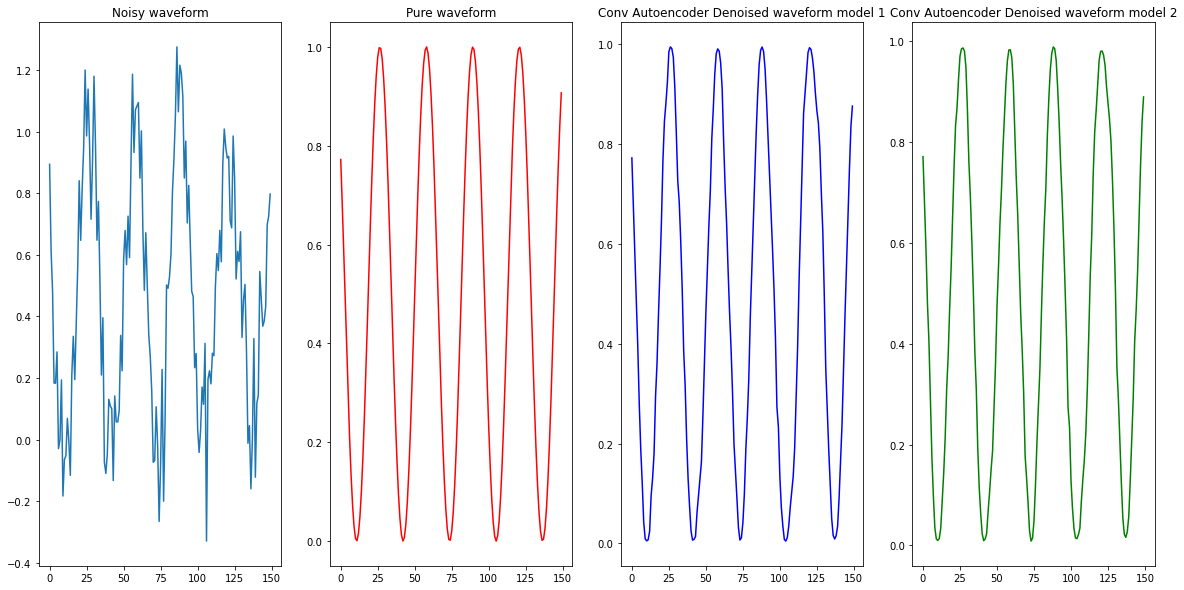

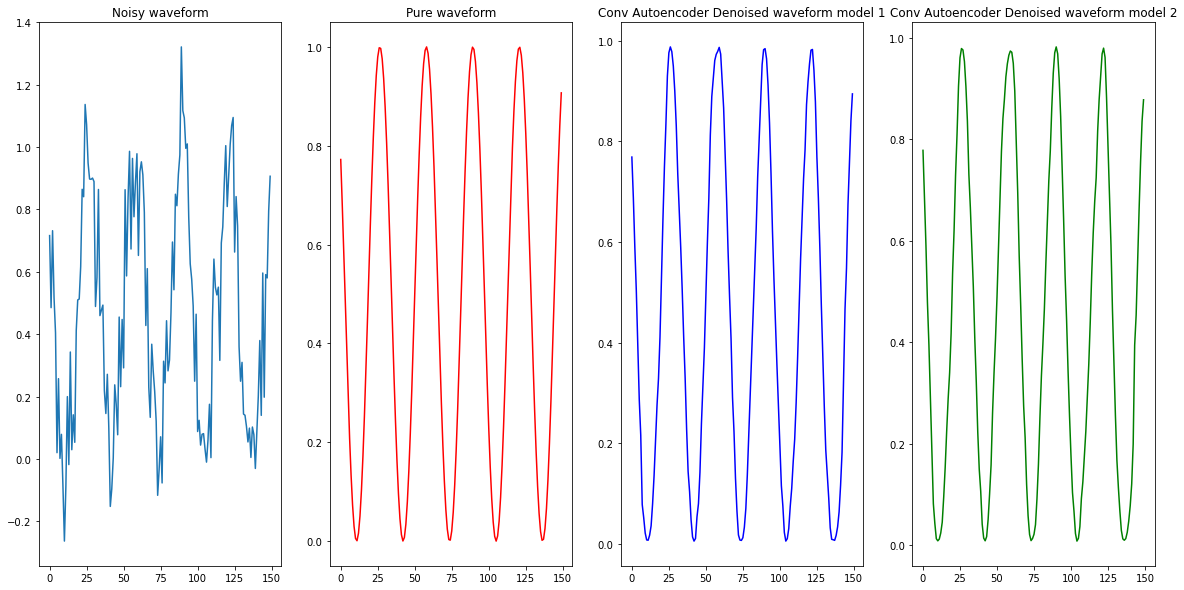

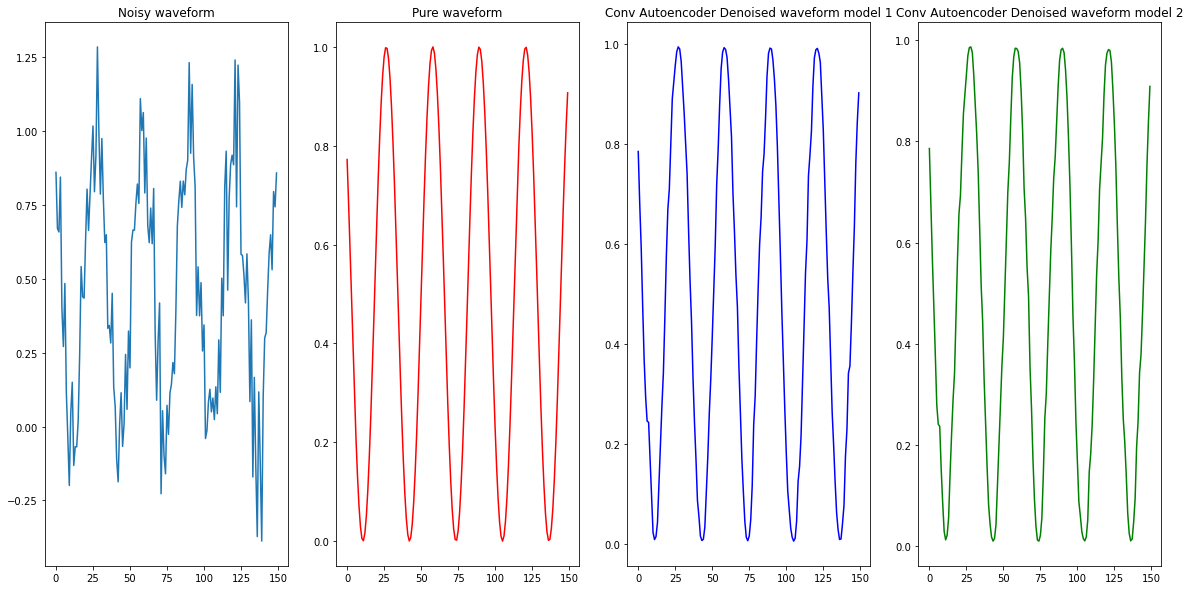

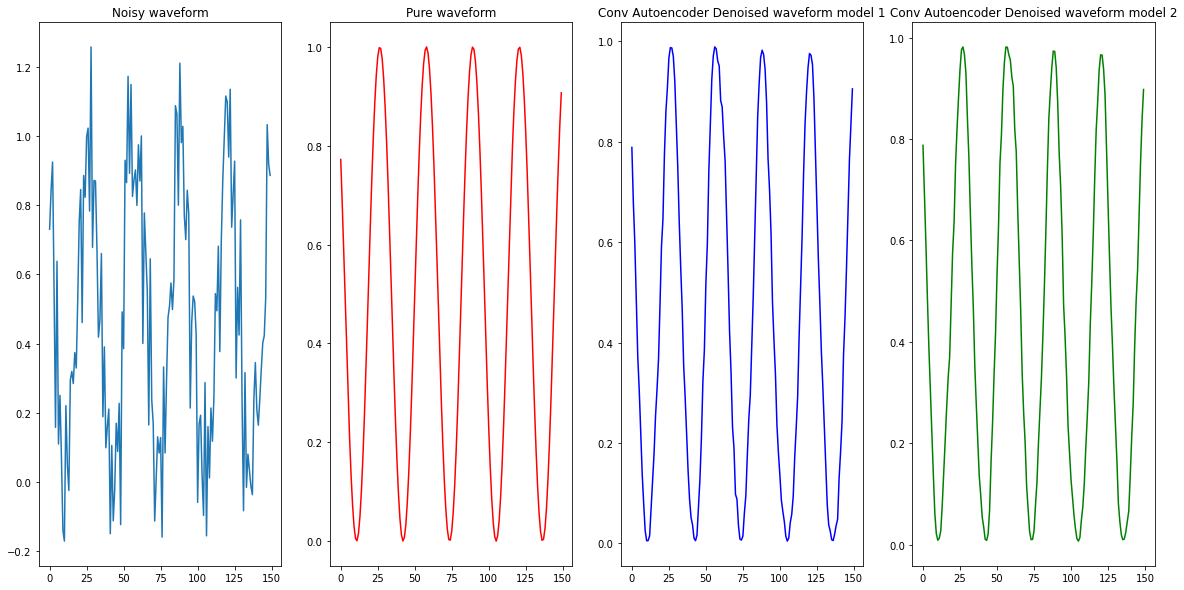

In [362]:
from pylab import rcParams
rcParams['figure.figsize'] = 20, 10
# Generate reconstructions
num_reconstructions = 4
samples = noisy_input_test[:num_reconstructions]
reconstructions = model.predict(samples)
reconstructions2 = model2.predict(samples)

# Plot 4 reconstructions
for i in np.arange(0, num_reconstructions):
  # Prediction index
  prediction_index = i + percentage_training
  # Get the sample and the reconstruction
  original = y_val_noisy[prediction_index]
  pure = y_val_pure[prediction_index]
  reconstruction = np.array(reconstructions[i])
  reconstruction2 = np.array(reconstructions2[i])
  # Matplotlib preparations
  fig, axes = plt.subplots(1, 4)
  # Plot sample and reconstruciton
  axes[0].plot(original)
  axes[0].set_title('Noisy waveform')
  axes[1].plot(pure, color='r')
  axes[1].set_title('Pure waveform')
  axes[2].plot(reconstruction, color='b')
  axes[2].set_title('Conv Autoencoder Denoised waveform model 1')
  axes[3].plot(reconstruction2, color='g')
  axes[3].set_title('Conv Autoencoder Denoised waveform model 2')
  plt.ylim(ymax = 1.5, ymin = -0.5)
  plt.show()

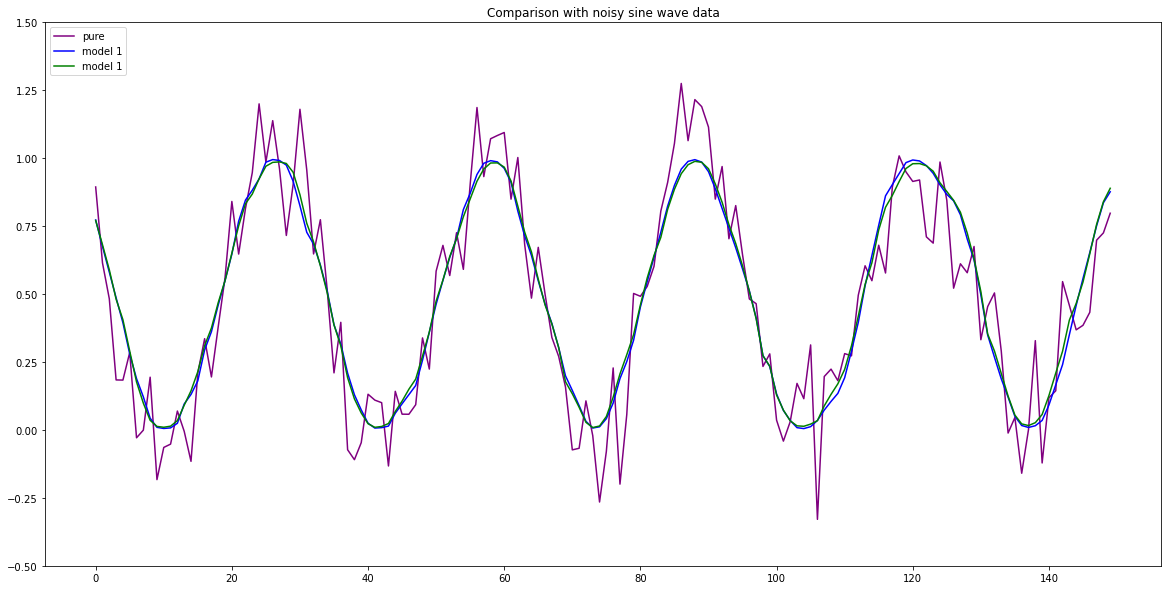

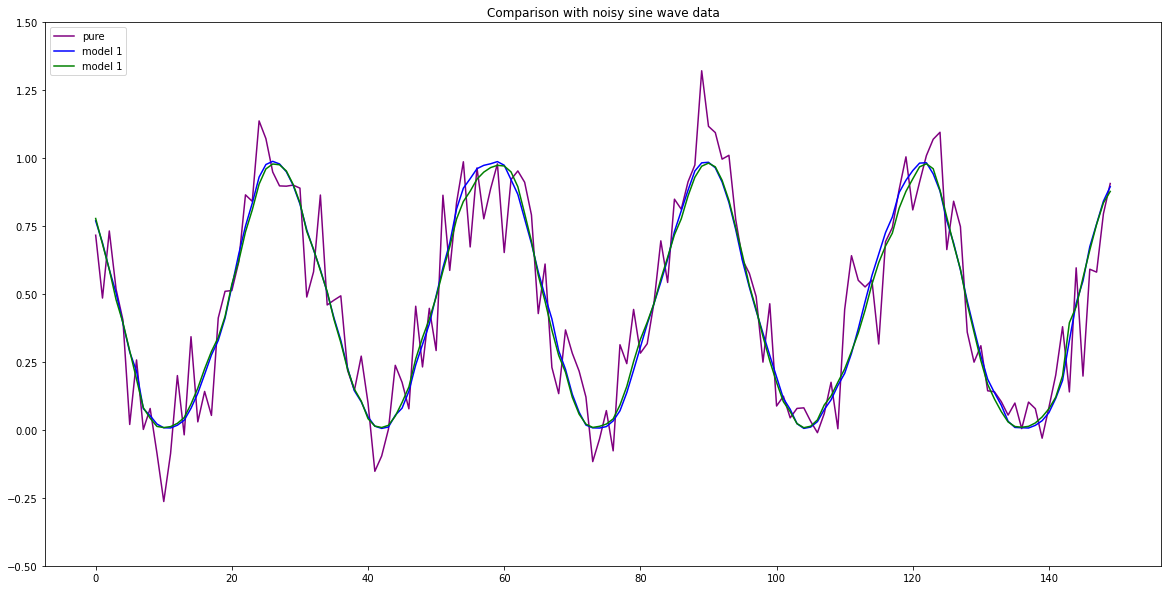

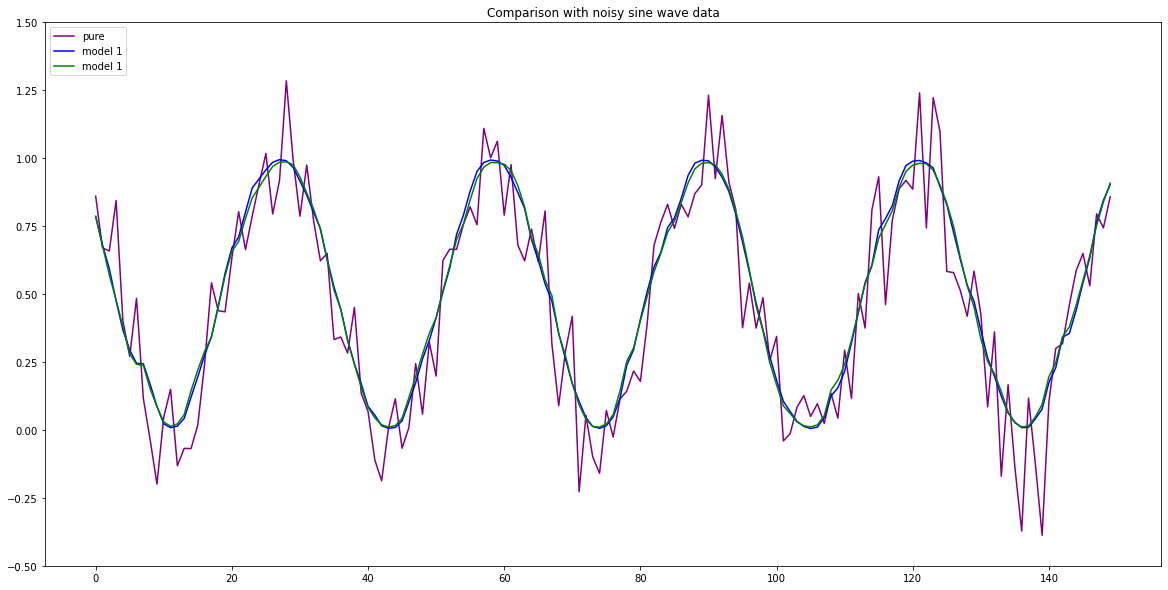

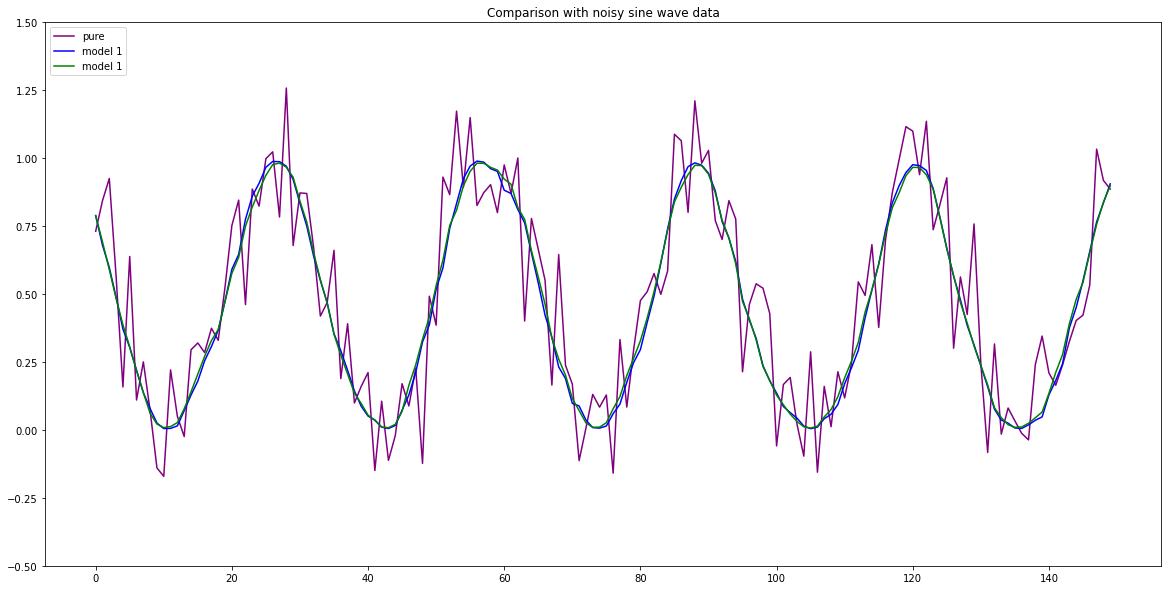

In [382]:
# Plot 4 reconstructions
for i in np.arange(0, num_reconstructions):
  # Prediction index
  prediction_index = i + percentage_training
  # Get the sample and the reconstruction
  original = y_val_noisy[prediction_index]
  pure = y_val_pure[prediction_index]
  reconstruction = np.array(reconstructions[i])
  reconstruction2 = np.array(reconstructions2[i])
  # Matplotlib preparations
  # Plot sample and reconstruciton
  plt.plot(original, color='purple', label="pure")
  plt.plot(reconstruction, color='b', label="model 1")
  plt.plot(reconstruction2, color='g',label="model 1")
  plt.ylim(ymax = 1.5, ymin = -0.5)
  plt.legend(loc="upper left")
  plt.title('Comparison with noisy sine wave data')
  plt.show()

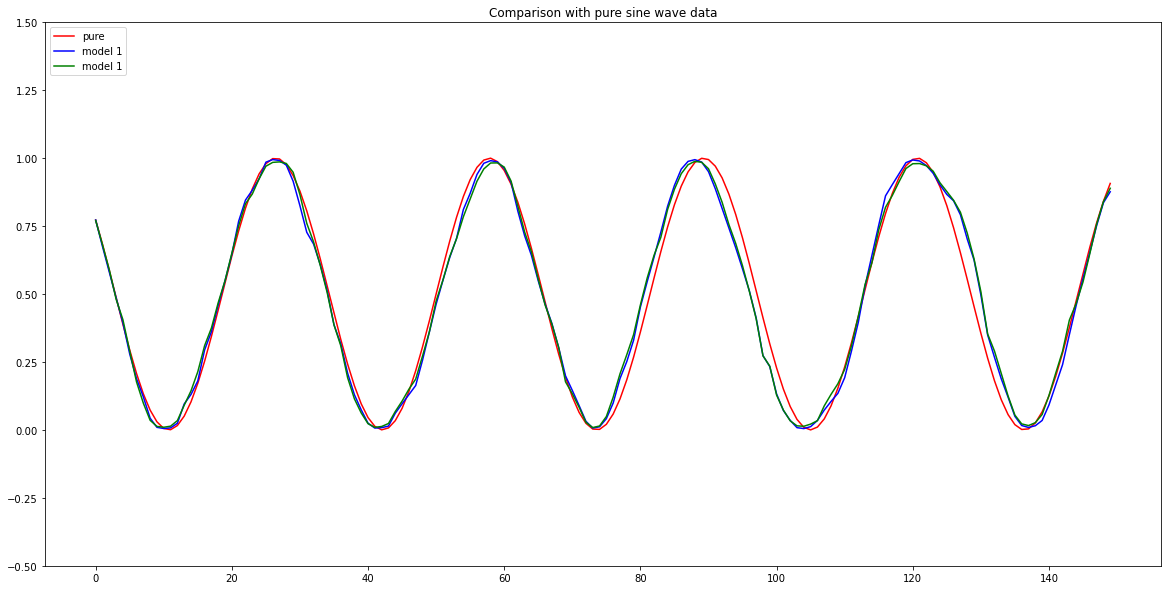

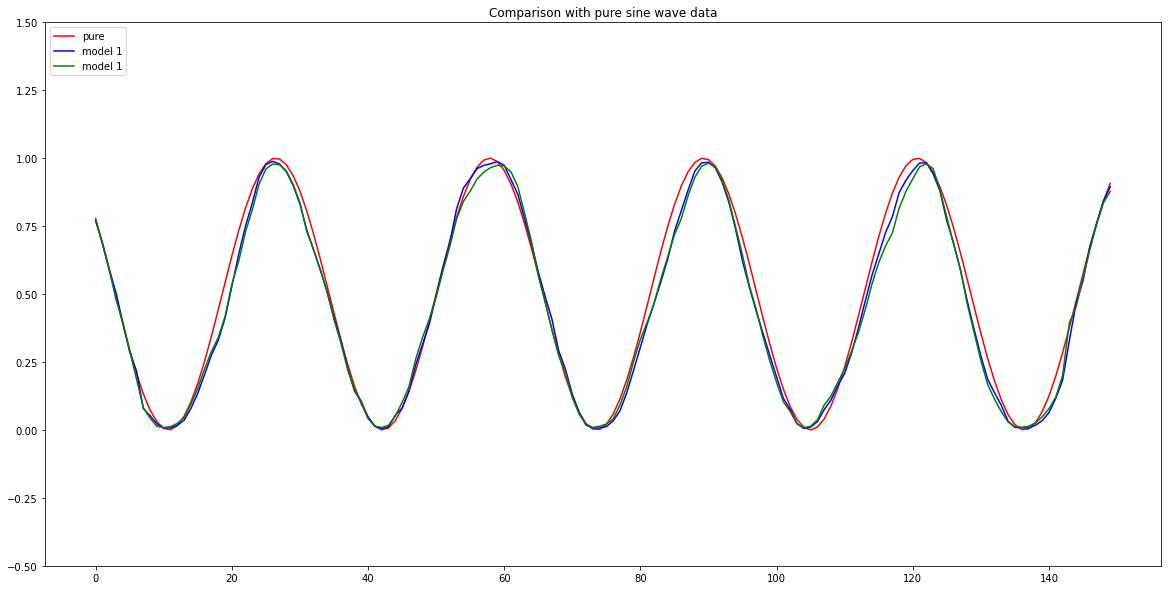

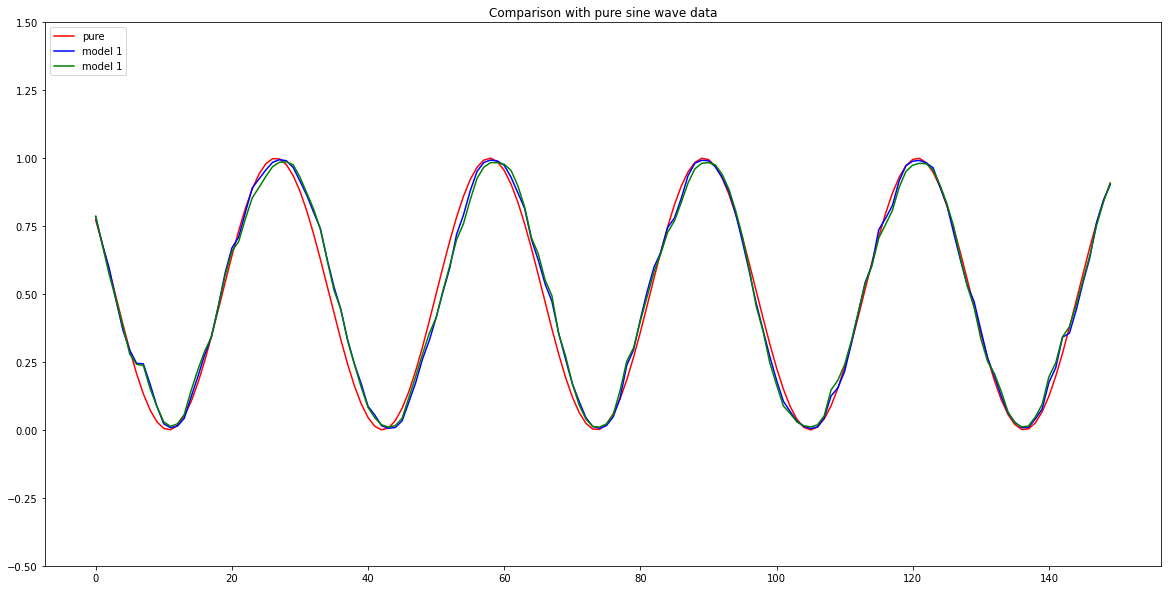

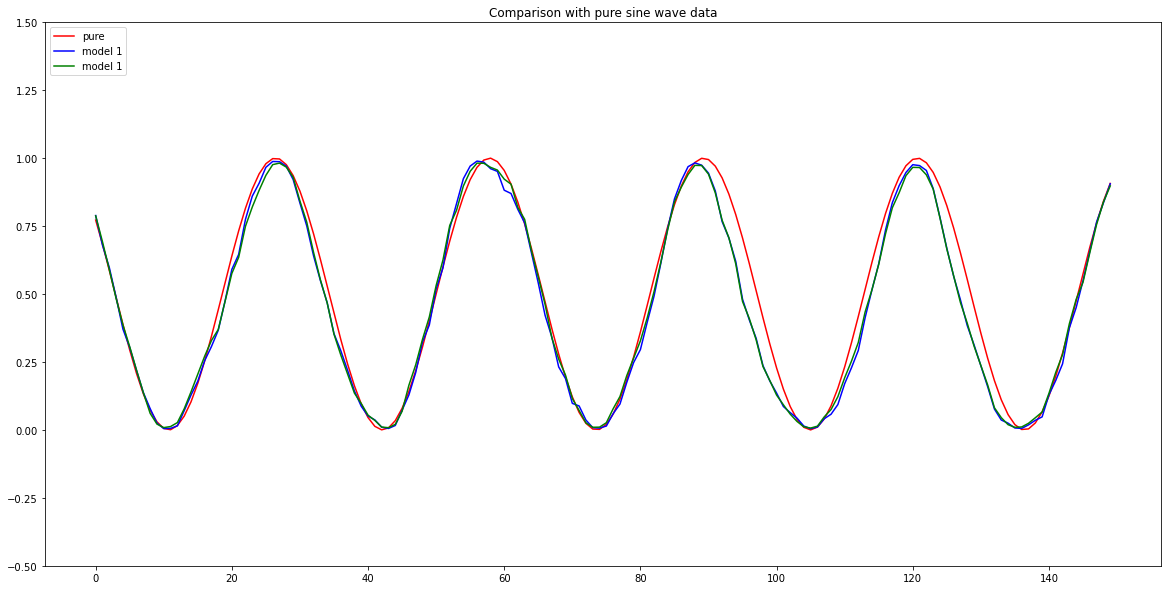

In [381]:
# Plot 4 reconstructions
for i in np.arange(0, num_reconstructions):
  # Prediction index
  prediction_index = i + percentage_training
  # Get the sample and the reconstruction
  original = y_val_noisy[prediction_index]
  pure = y_val_pure[prediction_index]
  reconstruction = np.array(reconstructions[i])
  reconstruction2 = np.array(reconstructions2[i])
  # Matplotlib preparations
  # Plot sample and reconstruciton
  plt.plot(pure, color='r', label="pure")
  plt.plot(reconstruction, color='b', label="model 1")
  plt.plot(reconstruction2, color='g',label="model 1")
  plt.ylim(ymax = 1.5, ymin = -0.5)
  plt.legend(loc="upper left")
  plt.title('Comparison with pure sine wave data')
  plt.show()

## Comments and conclusions

In this brief example we didn't go into the model optimization , which must be done via optimization metrics.

The logloss and accuracy mus be plotted against epoch to evaluate model improvements and a reduced loss over iteration. moreover the train/test dataset shall be refined to minimize runtime and improve efficiency.

However the goal was to see if we can restore most of the original signal; both models achieved pretty decent results despite a heavy noise contamination.



## Improvements and additions

As previously mentioned, a tail section of cross metrics neeed to be added to reinforce the results and enhance possible bottle necks.

The Exploratory Data Analysis was intentionally skipped, however it is the most important part of ML: if we have garbage in we have garbage out!
    
A full statistical analysis need to be added upfront to ensure the data is properly cleaned, scaled and normalize, remove any skew or trend.

Remove trends is extremely important before passing the data into the model computation to avoid large bias in the results.

We have been lucky that in this case the noise was randomly distributed. However we must remember that, even in the best bias-variance loss function minimization, we still have a portion of irreducible error that will interfere in our ability to achieve ground truth.
    